<h1> <b> <font color="Blue"> GRIP: The Sparks Foundation </font> </b> </h1>

<b> Data Science and Business Analytics Internship </b>

<b> Task 1: Prediction Using Supervised ML </b>

<b> Submitted By- Tirthankar Chakraborty </b>

 <font color='Blue'><h3> Prediction of percentage of a student based on the number of hours studied, using Simple Linear Regression. </h3></font>

 <font color='Blue'><li> <b> Importing Necessary Libraries </b> </li></font>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
print("Libraries imported successfully!")

Libraries imported successfully!


<font color='Blue'><li> <b> Reading given data from remote url </b> </li></font>

In [35]:
url = "https://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imported successfully!")

Data imported successfully!


<font color='Blue'><li> <b> Exploring given data </b> </li> </font>

In [36]:
print(data.head(10))
shape=data.shape
print(f'The shape of the data given: {shape}')

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25
The shape of the data given: (25, 2)


In [37]:
data.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<b>This is evident that there are no missing values. So we do not need to handle them exclusively. </b>

<font color='Blue'><li> <b> Detecting Outliers. </b> </li></font>

In [39]:
#Storing data attributes as individual series to plot them individually.
hours=data['Hours']
scores=data['Scores']

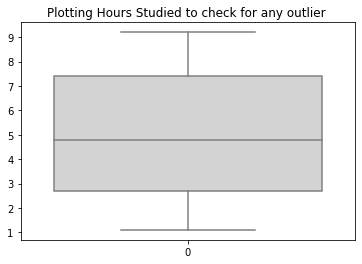

In [40]:
#Plotting hours data to check for any outlier
sns.boxplot(data=hours, orient = 'v', color='lightgrey' )
plt.title('Plotting Hours Studied to check for any outlier ')
plt.show()

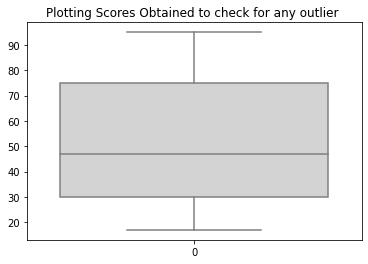

In [41]:
#Plotting scores data to check for any outlier
sns.boxplot(data=scores, orient = 'v',color='lightgrey')
plt.title('Plotting Scores Obtained to check for any outlier ')
plt.show()

<b> The above boxplots depict that there is no outlier in either of the data attributes. Hence, We are good to go! </b>

<font color='Blue'><li> <b> Plotting the data for further knowledge, using Scatter Diagram </b> </li></font>

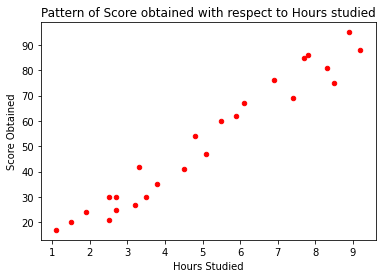

In [42]:
data.plot(kind='scatter',x='Hours', y='Scores', color='red')
plt.title('Pattern of Score obtained with respect to Hours studied')
plt.xlabel('Hours Studied')
plt.ylabel('Score Obtained')
plt.show()

<b> This shows that there is a strong positive linear correlation among the scores obtained and hours studied.</b>

<font color='Blue'><li> <b> Verifying the correlation. </b> </li></font>

In [43]:
data_corr1=data.corr(method='pearson')
data_corr1

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


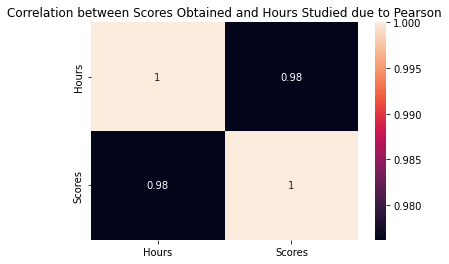

In [44]:
sns.heatmap(data_corr1, annot=True)
plt.title('Correlation between Scores Obtained and Hours Studied due to Pearson')
plt.show()

In [45]:
data_corr2=data.corr(method='spearman')
data_corr2

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


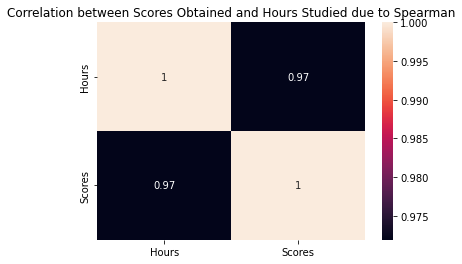

In [46]:
sns.heatmap(data_corr2, annot=True)
plt.title('Correlation between Scores Obtained and Hours Studied due to Spearman')
plt.show()

<b>We can conclude that there is a Strong Positive Linear Correlation between Scores Obtained and Hours Studied.</b>

<font color='Blue'><li> <b> Preparing Data </b> </li></font>

In [47]:
X = data.iloc[:, :-1].values   #x=attributes
y = data.iloc[:, 1].values     #y=labels

<font color='Blue'><li> <b> Splitting data for training and testing. </b> </li></font>

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
 
print('The data is divided into 75% training data and 25% test data.')

The data is divided into 75% training data and 25% test data.


<font color='Blue'><li> <b> Traning Model </b> </li></font>

In [49]:
from sklearn.linear_model import LinearRegression 
reg=LinearRegression()
reg.fit(X_train, y_train)
print('Training Completed!')

Training Completed!


<font color='Blue'><li><b> Fitting the Regression Line </b></li></font>

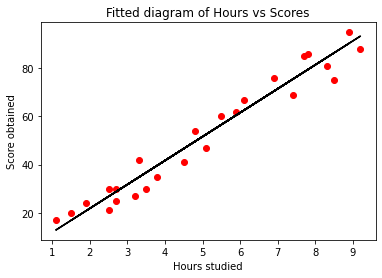

In [50]:
m=reg.coef_
c=reg.intercept_
line=m*X+c
plt.scatter(X,y,color='red')
plt.plot(X,line, color='Black')
plt.title('Fitted diagram of Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Score obtained')
plt.show()

<font color='Blue'><li> <b> Comparing the actual data with predicted data. </b> </li></font>

In [51]:
y_pred=reg.predict(X_test)

In [52]:
df=pd.DataFrame({'Actual Scores': y_test,'Predicted Scores':y_pred})
print(df)

   Actual Scores  Predicted Scores
0             20         16.844722
1             27         33.745575
2             69         75.500624
3             30         26.786400
4             62         60.588106
5             35         39.710582
6             24         20.821393


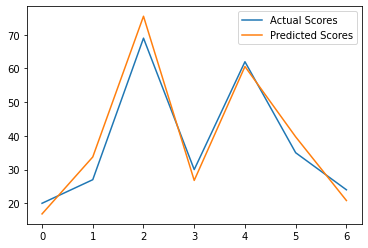

In [53]:
df.plot(kind='line')
plt.show()

<font color='Blue'><li> <b> Model Evaluation. </b> </li></font>

In [54]:
from sklearn import metrics
from sklearn.metrics import r2_score
print(f"Mean_Absolute_Error = { metrics.mean_absolute_error(y_test,y_pred)}")
print(f"R2_Score= {r2_score(y_test, y_pred)}")

Mean_Absolute_Error = 4.130879918502486
R2_Score= 0.9367661043365055


<b> The small value of Mean_Absolute_Error states that the chances of wrong prediction is very less.
    As well as the large value of R2_score(r_square) tells that our prediction is very precise. </b>

<font color='Blue'><li> <b> What would be the predicted score if a student studies 9.25 hours/day? </b> </li></font>

In [55]:
h=9.25
s=reg.predict([[h]])

print('If a student studies',h, 'hours per day, s/he will score %.2f' %s, '% in exam.')

If a student studies 9.25 hours per day, s/he will score 93.89 % in exam.


<font color='Blue'><h1><b>Thank You!</b></h1><font>